<a href="https://colab.research.google.com/github/Yeoonsu/SideProject/blob/main/%5B4_2%5D_log_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[4-1] 메모
2022.04.18 9:49 PM

- (완료) 연도별로 데이터 각각 따로 작업함.
- (완료) 4레벨(가장 하위 레벨) 데이터
- (완료) 예측 문제가 아니라 관계를 보려는 것이므로 연속하지 않은 가구도 포함 ===>> 연도별 csv 파일 merge_df 로 병합함
- (코딩 실패) 각 칼럼별로 min max 비율이 얼마인지 확인함

======= 여기까지 4-1.ipynb 파일 내용 ! =======
- 로그 스케일링
- TabNet 돌려서 에러율 비교, feature importance 확인

[4-2] 메모
2022.04.21 4:29 PM
- 로그 스케일링

질문1. 결측치 처리는 어떻게 해야할까. 아예 제외해야할까?


질문2. 특정 연도 부채에 어떤 연도의 정보가 영향을 크게 미치는지 보려면 어떻게 논리를 세우고 코딩해야할까?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_columns', None)

In [ ]:
merge_df = pd.read_csv("lev4_merge_220420.csv")
nolog_merge_df = pd.read_csv("lev4_merge_220420.csv")

In [ ]:
# pd.read_csv로 불러올 때마다 이상하게 생기는 맨 앞 인덱스 컬럼 없애줌
merge_df = merge_df.drop(merge_df.columns[0], axis=1)
nolog_merge_df = merge_df.drop(merge_df.columns[0], axis=1)

In [ ]:
merge_df.columns

Index(['조사년도', '가구고유번호', '가중값', '수도권코드', '가구주_성별코드', '가구원수', '노인가구코드',
       '조손가구코드', '한부모가구코드', '다문화가구코드', '장애인가구코드', '가구주_교육정도_학력코드',
       '가구주_교육정도_수학구분코드', '가구주_교육정도_통합코드', '가구주_동거코드', '가구주_산업대분류코드',
       '가구주_직업대분류코드', '가구주_만연령', '가구주_연령10세단위코드', '가구주_종사상지위코드',
       '보도용_가구주종사상지위코드', '가구주_혼인상태코드', '입주형태코드', '입주형태통합코드', '전용면적규모코드',
       '주택종류통합코드', '부채보유여부', '소득5분위코드(보완)', '소득계층구간코드(보도용)(보완)', '자산총액5분위코드',
       '순자산5분위코드', '자산_금융자산_저축_적립예치식저축금액', '자산_금융자산_저축_기타저축금액',
       '자산_금융자산_현거주지전월세보증금', '자산_실물자산_부동산_거주주택금액', '자산_실물자산_부동산_거주주택이외부동산금액',
       '자산_실물자산_부동산_계약금중도금납입금액', '자산_실물자산_기타실물자산_자동차금액', '자산_실물자산_기타실물자산_기타금액',
       '자산_실물자산_기타실물자산_기타_자동차이외기타실물자산', '자산_실물자산_기타실물자산_기타_권리금',
       '부채_금융부채_담보대출_대출용도_거주주택구입금액', '부채_금융부채_담보대출_대출용도_거주주택이외부동산구입금액',
       '부채_금융부채_담보대출_대출용도_전월세보증금마련금액', '부채_금융부채_담보대출_대출용도_부채상환금액',
       '부채_금융부채_담보대출_대출용도_사업자금마련금액', '부채_금융부채_담보대출_대출용도_생활비마련금액',
       '부채_금융부채_담보대출_대출용도_기타용도금액', '부채_금융부채_담보대출_대출기관_은행금액',
       '부채_금융부채_담보대출_대출

In [ ]:
list = merge_df.columns

In [ ]:
list[31]

'자산_금융자산_저축_적립예치식저축금액'

In [ ]:
list[108]

'지출_비소비지출_연간지급이자'

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_te

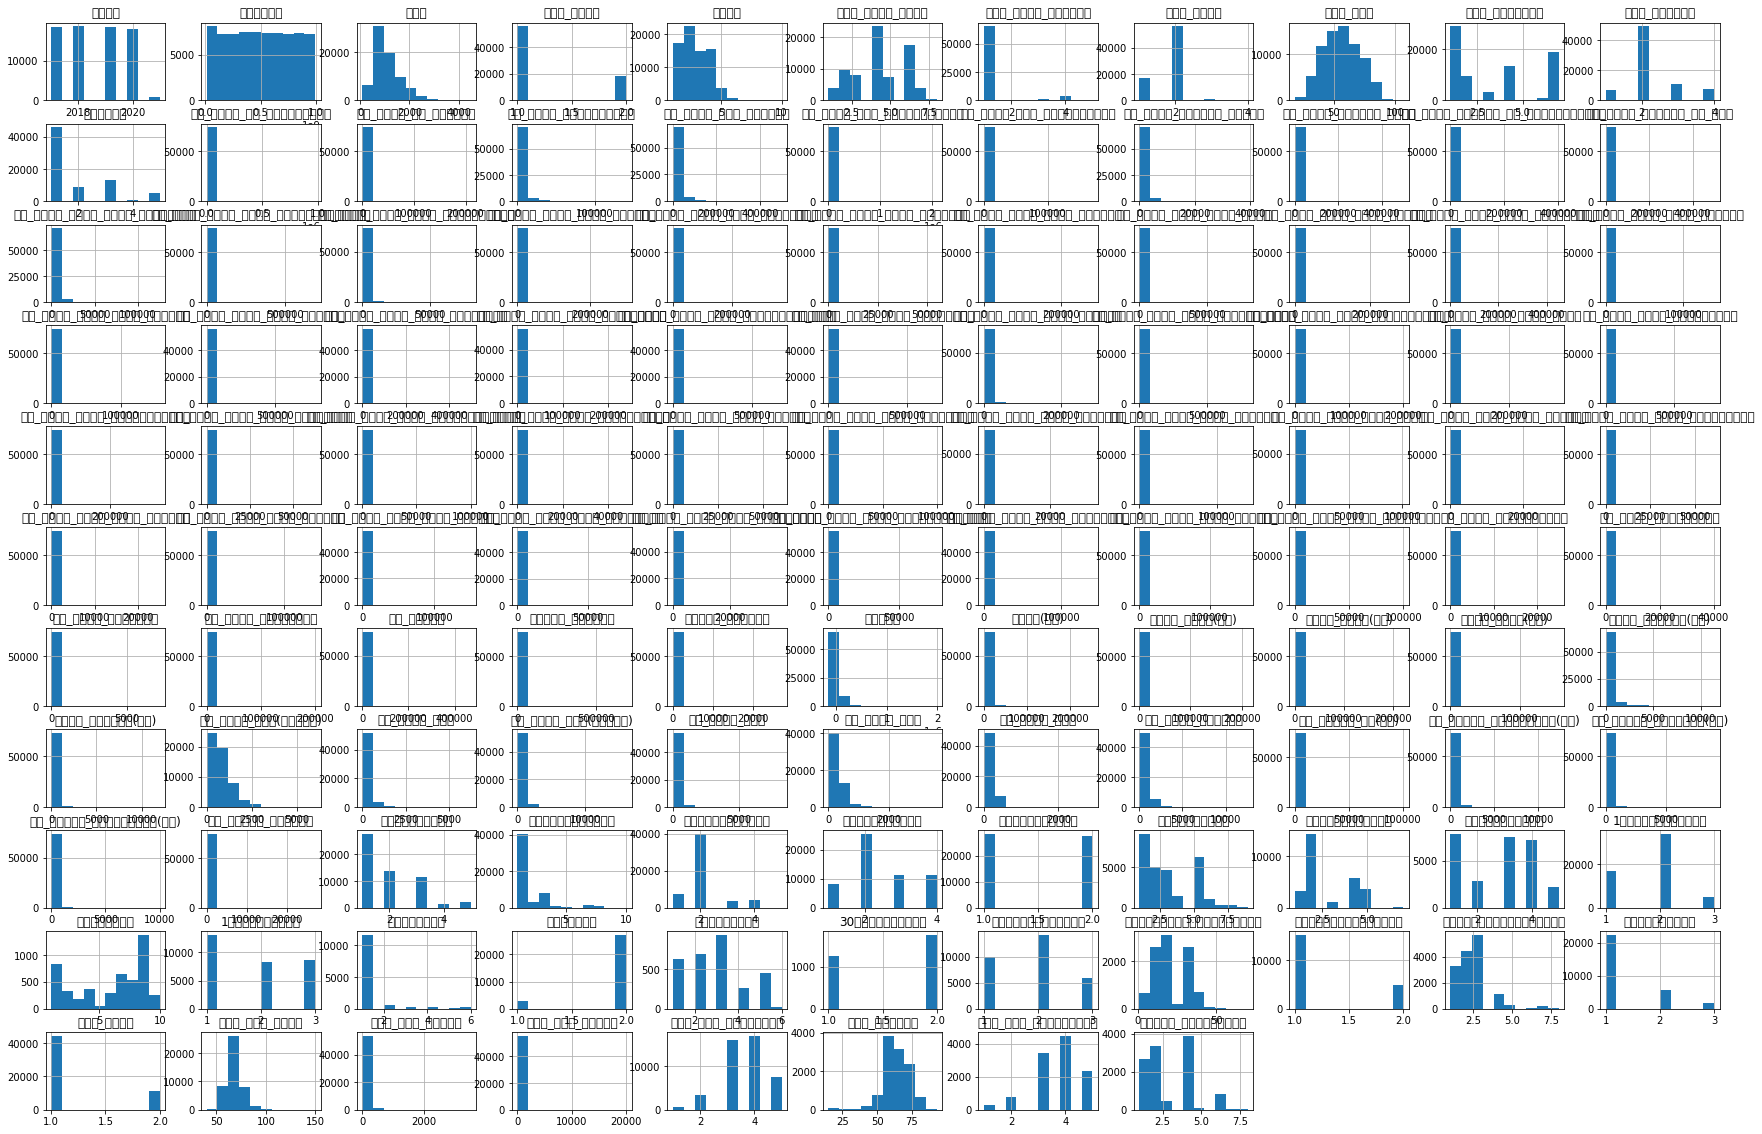

In [ ]:
before_log = merge_df.hist(figsize=(30,20))

In [ ]:
merge_df['자산_금융자산_저축_적립예치식저축금액']

0        65406.0
1         4648.0
2            5.0
3        11516.0
4          216.0
          ...   
74352       60.0
74353     9795.0
74354     7030.0
74355        6.0
74356        NaN
Name: 자산_금융자산_저축_적립예치식저축금액, Length: 74357, dtype: float64

In [ ]:
for i in range(31, 109):
  merge_df[list[i]] = np.log1p(merge_df[list[i]])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# 적용 잘 됐는지 확인
merge_df['자산_금융자산_저축_적립예치식저축금액']

0        11.088385
1         8.444407
2         1.791759
3         9.351579
4         5.379897
           ...    
74352     4.110874
74353     9.189729
74354     8.858084
74355     1.945910
74356          NaN
Name: 자산_금융자산_저축_적립예치식저축금액, Length: 74357, dtype: float64

In [ ]:
# 로그스케일링
# 처음에 for문 쓰는거 겁먹고 엑셀로 만든거
# 컨트롤 + / 누르면 여러줄 주석 가능함

# merge_df['자산_금융자산_저축_적립예치식저축금액'] = np.log1p(merge_df['자산_금융자산_저축_적립예치식저축금액'])
# merge_df['자산_금융자산_저축_기타저축금액'] = np.log1p(merge_df['자산_금융자산_저축_기타저축금액'])
# merge_df['자산_금융자산_현거주지전월세보증금'] = np.log1p(merge_df['자산_금융자산_현거주지전월세보증금'])
# merge_df['자산_실물자산_부동산_거주주택금액'] = np.log1p(merge_df['자산_실물자산_부동산_거주주택금액'])
# merge_df['자산_실물자산_부동산_거주주택이외부동산금액'] = np.log1p(merge_df['자산_실물자산_부동산_거주주택이외부동산금액'])
# merge_df['자산_실물자산_부동산_계약금중도금납입금액'] = np.log1p(merge_df['자산_실물자산_부동산_계약금중도금납입금액'])
# merge_df['자산_실물자산_기타실물자산_자동차금액'] = np.log1p(merge_df['자산_실물자산_기타실물자산_자동차금액'])
# merge_df['자산_실물자산_기타실물자산_기타금액'] = np.log1p(merge_df['자산_실물자산_기타실물자산_기타금액'])
# merge_df['자산_실물자산_기타실물자산_기타_자동차이외기타실물자산'] = np.log1p(merge_df['자산_실물자산_기타실물자산_기타_자동차이외기타실물자산'])
# merge_df['자산_실물자산_기타실물자산_기타_권리금'] = np.log1p(merge_df['자산_실물자산_기타실물자산_기타_권리금'])
# merge_df['부채_금융부채_담보대출_대출용도_거주주택구입금액'] = np.log1p(merge_df['부채_금융부채_담보대출_대출용도_거주주택구입금액'])
# merge_df['부채_금융부채_담보대출_대출용도_거주주택이외부동산구입금액'] = np.log1p(merge_df['부채_금융부채_담보대출_대출용도_거주주택이외부동산구입금액'])
# merge_df['부채_금융부채_담보대출_대출용도_전월세보증금마련금액'] = np.log1p(merge_df['부채_금융부채_담보대출_대출용도_전월세보증금마련금액'])
# merge_df['부채_금융부채_담보대출_대출용도_부채상환금액'] = np.log1p(merge_df['부채_금융부채_담보대출_대출용도_부채상환금액'])
# merge_df['부채_금융부채_담보대출_대출용도_사업자금마련금액'] = np.log1p(merge_df['부채_금융부채_담보대출_대출용도_사업자금마련금액'])
# merge_df['부채_금융부채_담보대출_대출용도_생활비마련금액'] = np.log1p(merge_df['부채_금융부채_담보대출_대출용도_생활비마련금액'])
# merge_df['부채_금융부채_담보대출_대출용도_기타용도금액'] = np.log1p(merge_df['부채_금융부채_담보대출_대출용도_기타용도금액'])
# merge_df['부채_금융부채_담보대출_대출기관_은행금액'] = np.log1p(merge_df['부채_금융부채_담보대출_대출기관_은행금액'])
# merge_df['부채_금융부채_담보대출_대출기관_저축은행금액'] = np.log1p(merge_df['부채_금융부채_담보대출_대출기관_저축은행금액'])
# merge_df['부채_금융부채_담보대출_대출기관_비은행금융기관금액'] = np.log1p(merge_df['부채_금융부채_담보대출_대출기관_비은행금융기관금액'])
# merge_df['부채_금융부채_담보대출_대출기관_보험회사금액'] = np.log1p(merge_df['부채_금융부채_담보대출_대출기관_보험회사금액'])
# merge_df['부채_금융부채_담보대출_대출기관_기타기관금액'] = np.log1p(merge_df['부채_금융부채_담보대출_대출기관_기타기관금액'])
# merge_df['부채_금융부채_담보대출_상환방법_만기일시금액'] = np.log1p(merge_df['부채_금융부채_담보대출_상환방법_만기일시금액'])
# merge_df['부채_금융부채_담보대출_상환방법_원금분할상환금액'] = np.log1p(merge_df['부채_금융부채_담보대출_상환방법_원금분할상환금액'])
# merge_df['부채_금융부채_담보대출_상환방법_원리금분할상환금액'] = np.log1p(merge_df['부채_금융부채_담보대출_상환방법_원리금분할상환금액'])
# merge_df['부채_금융부채_담보대출_상환방법_원리금분할일부만기상환금액'] = np.log1p(merge_df['부채_금융부채_담보대출_상환방법_원리금분할일부만기상환금액'])
# merge_df['부채_금융부채_담보대출_상환방법_기타상환방법금액'] = np.log1p(merge_df['부채_금융부채_담보대출_상환방법_기타상환방법금액'])
# merge_df['부채_금융부채_담보대출_담보형태_거주주택금액'] = np.log1p(merge_df['부채_금융부채_담보대출_담보형태_거주주택금액'])
# merge_df['부채_금융부채_담보대출_담보형태_거주주택이외부동산금액'] = np.log1p(merge_df['부채_금융부채_담보대출_담보형태_거주주택이외부동산금액'])
# merge_df['부채_금융부채_담보대출_담보형태_예적금보험펀드채권금액'] = np.log1p(merge_df['부채_금융부채_담보대출_담보형태_예적금보험펀드채권금액'])
# merge_df['부채_금융부채_담보대출_담보형태_기타금액'] = np.log1p(merge_df['부채_금융부채_담보대출_담보형태_기타금액'])
# merge_df['부채_금융부채_담보대출_부동산담보대출금액'] = np.log1p(merge_df['부채_금융부채_담보대출_부동산담보대출금액'])
# merge_df['부채_금융부채_담보대출_부동산이외담보대출금액'] = np.log1p(merge_df['부채_금융부채_담보대출_부동산이외담보대출금액'])
# merge_df['부채_금융부채_신용대출_대출용도_거주주택구입금액'] = np.log1p(merge_df['부채_금융부채_신용대출_대출용도_거주주택구입금액'])
# merge_df['부채_금융부채_신용대출_대출용도_거주주택이외부동산구입금액'] = np.log1p(merge_df['부채_금융부채_신용대출_대출용도_거주주택이외부동산구입금액'])
# merge_df['부채_금융부채_신용대출_대출용도_전월세보증금마련금액'] = np.log1p(merge_df['부채_금융부채_신용대출_대출용도_전월세보증금마련금액'])
# merge_df['부채_금융부채_신용대출_대출용도_부채상환금액'] = np.log1p(merge_df['부채_금융부채_신용대출_대출용도_부채상환금액'])
# merge_df['부채_금융부채_신용대출_대출용도_사업자금마련금액'] = np.log1p(merge_df['부채_금융부채_신용대출_대출용도_사업자금마련금액'])
# merge_df['부채_금융부채_신용대출_대출용도_생활비마련금액'] = np.log1p(merge_df['부채_금융부채_신용대출_대출용도_생활비마련금액'])
# merge_df['부채_금융부채_신용대출_대출용도_기타용도금액'] = np.log1p(merge_df['부채_금융부채_신용대출_대출용도_기타용도금액'])
# merge_df['부채_금융부채_신용대출_대출기관_은행금액'] = np.log1p(merge_df['부채_금융부채_신용대출_대출기관_은행금액'])
# merge_df['부채_금융부채_신용대출_대출기관_저축은행금액'] = np.log1p(merge_df['부채_금융부채_신용대출_대출기관_저축은행금액'])
# merge_df['부채_금융부채_신용대출_대출기관_비은행금융기관금액'] = np.log1p(merge_df['부채_금융부채_신용대출_대출기관_비은행금융기관금액'])
# merge_df['부채_금융부채_신용대출_대출기관_보험회사금액'] = np.log1p(merge_df['부채_금융부채_신용대출_대출기관_보험회사금액'])
# merge_df['부채_금융부채_신용대출_대출기관_기타기관금액'] = np.log1p(merge_df['부채_금융부채_신용대출_대출기관_기타기관금액'])
# merge_df['부채_금융부채_신용대출_상환방법_만기일시금액'] = np.log1p(merge_df['부채_금융부채_신용대출_상환방법_만기일시금액'])
# merge_df['부채_금융부채_신용대출_상환방법_원리분할상환금액'] = np.log1p(merge_df['부채_금융부채_신용대출_상환방법_원리분할상환금액'])
# merge_df['부채_금융부채_신용대출_상환방법_원리금분할상환금액'] = np.log1p(merge_df['부채_금융부채_신용대출_상환방법_원리금분할상환금액'])
# merge_df['부채_금융부채_신용대출_상환방법_원리금분할일부만기상환금액'] = np.log1p(merge_df['부채_금융부채_신용대출_상환방법_원리금분할일부만기상환금액'])
# merge_df['부채_금융부채_신용대출_상환방법_기타상환방법금액'] = np.log1p(merge_df['부채_금융부채_신용대출_상환방법_기타상환방법금액'])
# merge_df['부채_금융부채_신용대출_대출종류_신용대출금액'] = np.log1p(merge_df['부채_금융부채_신용대출_대출종류_신용대출금액'])
# merge_df['부채_금융부채_신용대출_대출종류_마이너스통장금액'] = np.log1p(merge_df['부채_금융부채_신용대출_대출종류_마이너스통장금액'])
# merge_df['부채_금융부채_신용카드관련대출금액'] = np.log1p(merge_df['부채_금융부채_신용카드관련대출금액'])
# merge_df['부채_금융부채_외상할부미상환금액'] = np.log1p(merge_df['부채_금융부채_외상할부미상환금액'])
# merge_df['부채_금융부채_계탄후불입금액'] = np.log1p(merge_df['부채_금융부채_계탄후불입금액'])
# merge_df['부채_금융부채_개인직장빌린금액'] = np.log1p(merge_df['부채_금융부채_개인직장빌린금액'])
# merge_df['부채_임대보증금'] = np.log1p(merge_df['부채_임대보증금'])
# merge_df['원리금상환_원금상환금액'] = np.log1p(merge_df['원리금상환_원금상환금액'])
# merge_df['원리금상환_이자지급금액'] = np.log1p(merge_df['원리금상환_이자지급금액'])
# merge_df['순자산금액'] = np.log1p(merge_df['순자산금액'])
# merge_df['경상소득(보완)'] = np.log1p(merge_df['경상소득(보완)'])
# merge_df['경상소득_근로소득(보완)'] = np.log1p(merge_df['경상소득_근로소득(보완)'])
# merge_df['경상소득_사업소득(보완)'] = np.log1p(merge_df['경상소득_사업소득(보완)'])
# merge_df['경상소득_재산소득(보완)'] = np.log1p(merge_df['경상소득_재산소득(보완)'])
# merge_df['경상소득_공적이전소득(보완)'] = np.log1p(merge_df['경상소득_공적이전소득(보완)'])
# merge_df['경상소득_사적이전소득(조사)'] = np.log1p(merge_df['경상소득_사적이전소득(조사)'])
# merge_df['지출_소비지출_식료품(외식비포함)'] = np.log1p(merge_df['지출_소비지출_식료품(외식비포함)'])
# merge_df['지출_소비지출_주거비'] = np.log1p(merge_df['지출_소비지출_주거비'])
# merge_df['지출_소비지출_교육비(보육료포함)'] = np.log1p(merge_df['지출_소비지출_교육비(보육료포함)'])
# merge_df['지출_소비지출_의료비'] = np.log1p(merge_df['지출_소비지출_의료비'])
# merge_df['지출_소비지출_교통비'] = np.log1p(merge_df['지출_소비지출_교통비'])
# merge_df['지출_소비지출_통신비'] = np.log1p(merge_df['지출_소비지출_통신비'])
# merge_df['지출_소비지출_기타소비지출'] = np.log1p(merge_df['지출_소비지출_기타소비지출'])
# merge_df['지출_비소비지출_세금(보완)'] = np.log1p(merge_df['지출_비소비지출_세금(보완)'])
# merge_df['지출_비소비지출_공적연금사회보험료(보완)'] = np.log1p(merge_df['지출_비소비지출_공적연금사회보험료(보완)'])
# merge_df['지출_비소비지출_가구간이전지출(조사)'] = np.log1p(merge_df['지출_비소비지출_가구간이전지출(조사)'])
# merge_df['지출_비소비지출_비영리단체이전지출(조사)'] = np.log1p(merge_df['지출_비소비지출_비영리단체이전지출(조사)'])
# merge_df['지출_비소비지출_연간지급이자'] = np.log1p(merge_df['지출_비소비지출_연간지급이자'])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_te

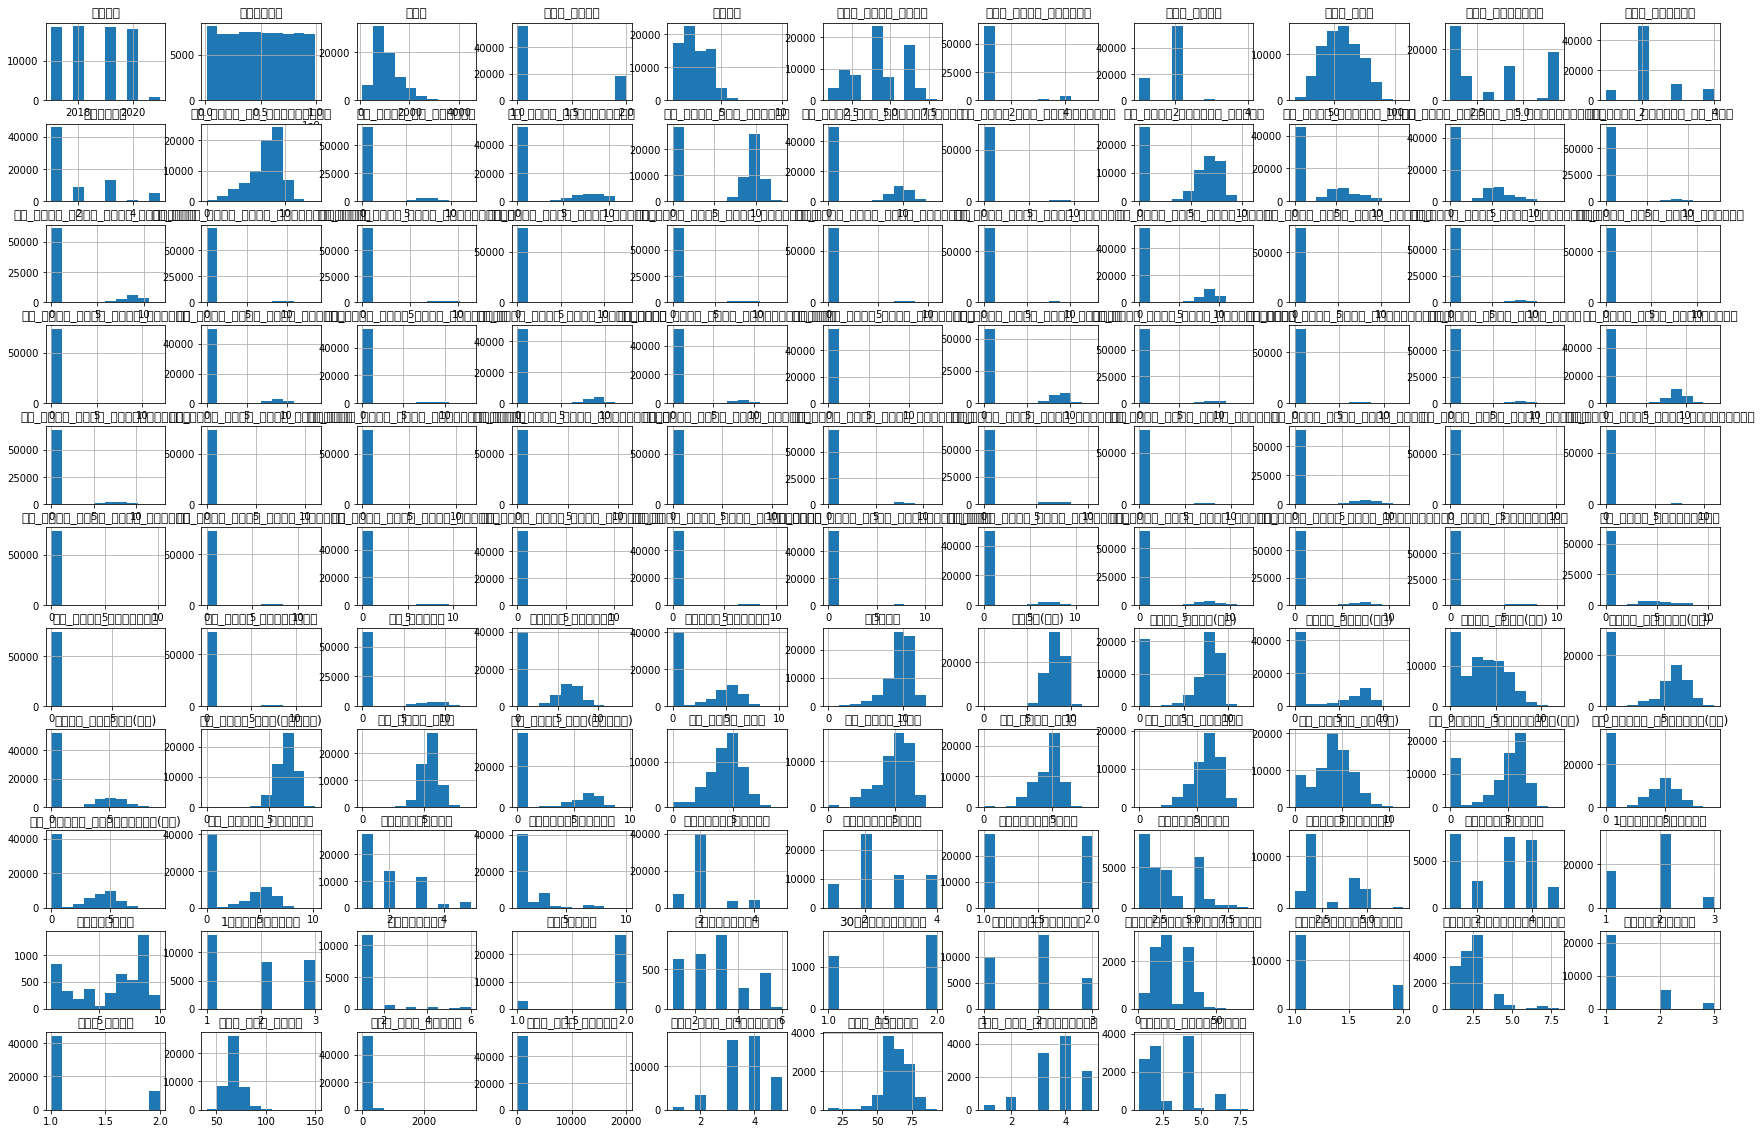

In [ ]:
after_log = merge_df.hist(figsize=(30,20))

In [ ]:
# hist 폰트 한글 깨지는거 제발 해결하기.........ㅠㅠㅠ

https://colab.research.google.com/github/nicewook/datascience_exercise/blob/master/korean_font_on_matplotlib.ipynb

여기서 따라하면 됨 코랩에서 한글폰트 사용하기


In [ ]:
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [ ]:
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.2.2
/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


In [ ]:
# 시스템에 설치된 폰트 확인. 나눔은 없다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/f

In [ ]:
fm._rebuild()

In [ ]:
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic


IndexError: ignored

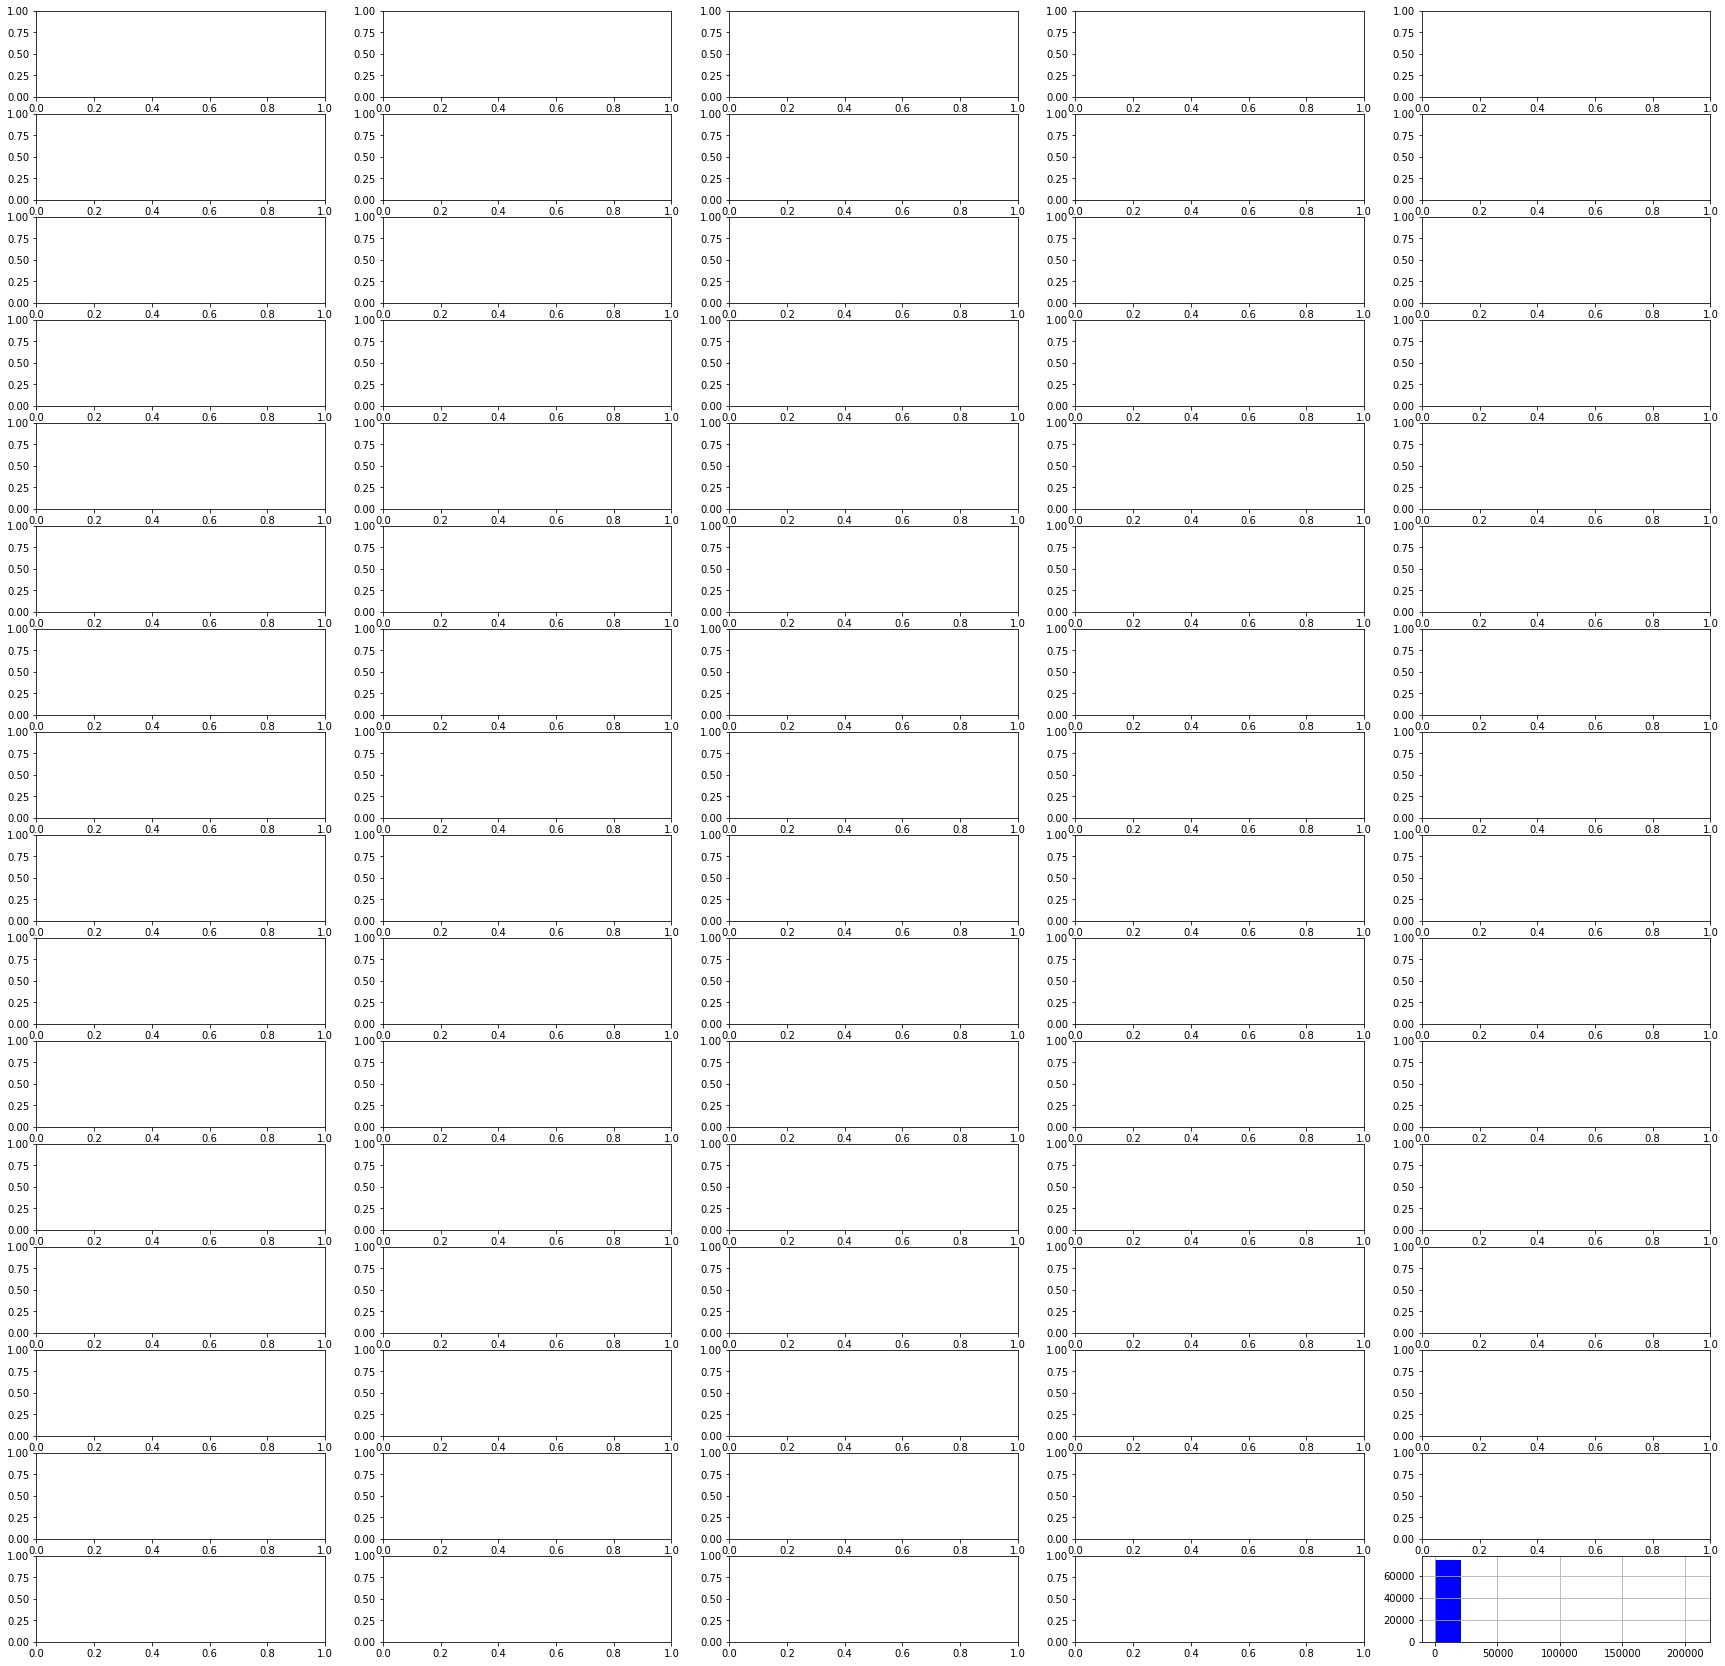

In [ ]:
f, axes = plt.subplots(16, 5, figsize=(30, 30))
# f.set_size_inches((12, 12))
# plt.subplots_adjust(wspace = 0.15, hspace = 0.15)

axes[16] = nolog_merge_df.iloc[:, 31].hist(color='b')

plt.show()

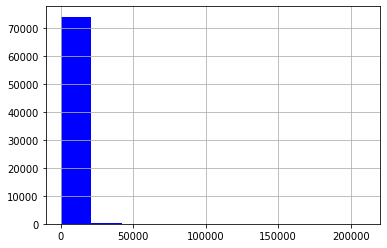

In [ ]:
nolog_merge_df.iloc[:, 31].hist(color='b')

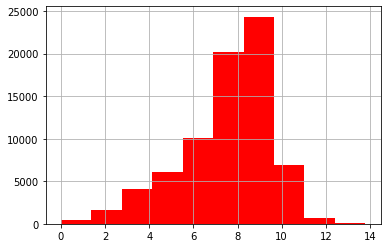

In [ ]:
merge_df.iloc[:, 31].hist(color='r')

TypeError: ignored

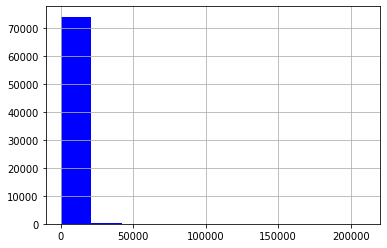

In [ ]:
# before = nolog_merge_df.iloc[:, 31].hist(color='b')
# after = merge_df.iloc[:, 31].hist(color='r')

# bins = np.linspace(-10, 10, 50)

# plt.hist(before, bins, alpha = 0.5, label='before')
# plt.hist(after, bins, alpha = 0.5, label='after')
# plt.legend(loc='upper left')

# plt.show()

In [ ]:
y = np.random.standard_normal((1000,2))
y

array([[ 1.04528447, -1.26747586],
       [ 2.59745572,  0.66707708],
       [ 1.39620489, -0.7420387 ],
       ...,
       [ 1.15365814, -0.36383494],
       [-0.38823049, -0.48636885],
       [ 1.19354464,  0.21394993]])

In [ ]:
# merge_df와 nolog_merge_df를 컬럼별로 쌍을 이루게 2차원 행렬로 만들어야함
# 그래서 hist() 로 각각의 컬럼을 색상을 달리해서 차이를 보여줄 수 있게 시각화해줌
for i in range(31, 109):
  y = (merge_df.iloc[:, i], nolog_merge_df.iloc[:, i])

In [ ]:
array = np.asarray(y)
array

array([[5.68357977, 7.16006921, 0.        , ..., 0.        , 0.        ,
               nan],
       [       nan,        nan,        nan, ..., 1.        , 1.        ,
               nan]])

In [ ]:
len(merge_df)

74357

In [ ]:
col_31 = []

for i in range(len(merge_df)):
  col_31.append([merge_df.iloc[i, 31], nolog_merge_df.iloc[i, 31]])

# list to array
col_31 = np.array(col_31)

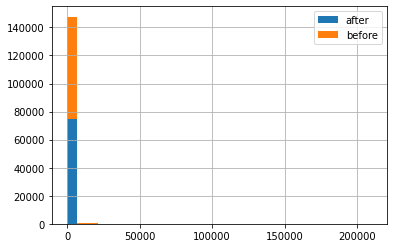

In [ ]:
# 크기 키우는 옵션 찾다가 포기함.. 없는듯
plt.hist(col_31, label=['after','before'], stacked=True, bins=30)
plt.legend(loc=0)
plt.grid()

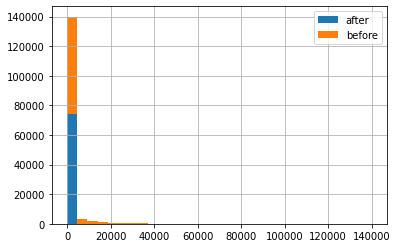

In [ ]:
col_32 = []

for i in range(len(merge_df)):
  col_32.append([merge_df.iloc[i, 32], nolog_merge_df.iloc[i, 32]])

# list to array
col_32 = np.array(col_32)

plt.hist(col_32, label=['after','before'], stacked=True, bins=30)
plt.legend(loc=0)
plt.grid()

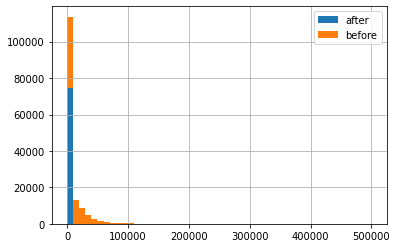

In [ ]:
for j in range(33, 34):
  col_j = []

  for i in range(len(merge_df)):
    col_j.append([merge_df.iloc[i, j], nolog_merge_df.iloc[i, j]])
  
  col_j = np.array(col_j)
    
  plt.hist(col_j, label=['after','before'], stacked=True, bins=50)
  plt.legend(loc=0)
  plt.grid()

  # 그래프를 각각 따로 생성하려면 어케해야하지..

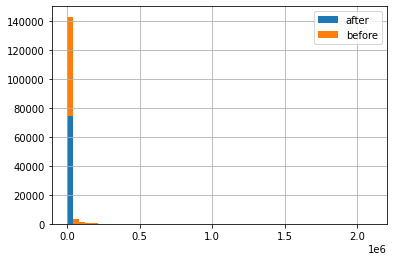

In [ ]:
for j in range(34, 35):
  col_j = []

  for i in range(len(merge_df)):
    col_j.append([merge_df.iloc[i, j], nolog_merge_df.iloc[i, j]])
  
  col_j = np.array(col_j)
    
  plt.hist(col_j, label=['after','before'], stacked=True, bins=50)
  plt.legend(loc=0)
  plt.grid()

  # 그래프를 각각 따로 생성하려면 어케해야하지..

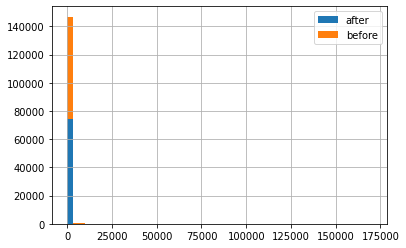

In [ ]:
for j in range(35, 36):
  col_j = []

  for i in range(len(merge_df)):
    col_j.append([merge_df.iloc[i, j], nolog_merge_df.iloc[i, j]])
  
  col_j = np.array(col_j)
    
  plt.hist(col_j, label=['after','before'], stacked=True, bins=50)
  plt.legend(loc=0)
  plt.grid()

  # 그래프를 각각 따로 생성하려면 어케해야하지..

In [ ]:
#위의 코드들처럼 자석 n극 s극마냥 나오는 그래프는 시각화를 해도 의미가 없을 것 같다
#원하는 range만 확대하는 기능도 못찾겠고 .. 다른 방법을 시도해봐야겠다

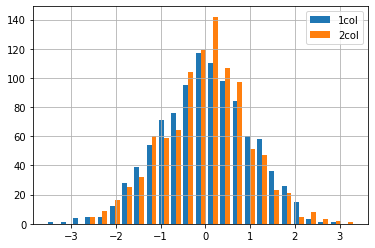

In [ ]:
y = np.random.standard_normal((1000,2))
plt.hist(y, label=['1col','2col'],bins=25)
plt.legend(loc=0)
plt.grid()

In [ ]:
y

array([[-0.91993602, -0.02670942],
       [-0.23719974, -1.15613129],
       [ 1.2841899 ,  0.36447899],
       ...,
       [ 0.00720054,  1.089068  ],
       [ 0.04039703, -0.52083014],
       [ 1.89090694,  0.07179037]])

In [ ]:
plt.hist(col_31, label=['after', 'before'], stacked=True, bins=25)
plt.legend(loc=0)
plt.grid()

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:6630: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:6631: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


KeyboardInterrupt: ignored

AttributeError: ignored

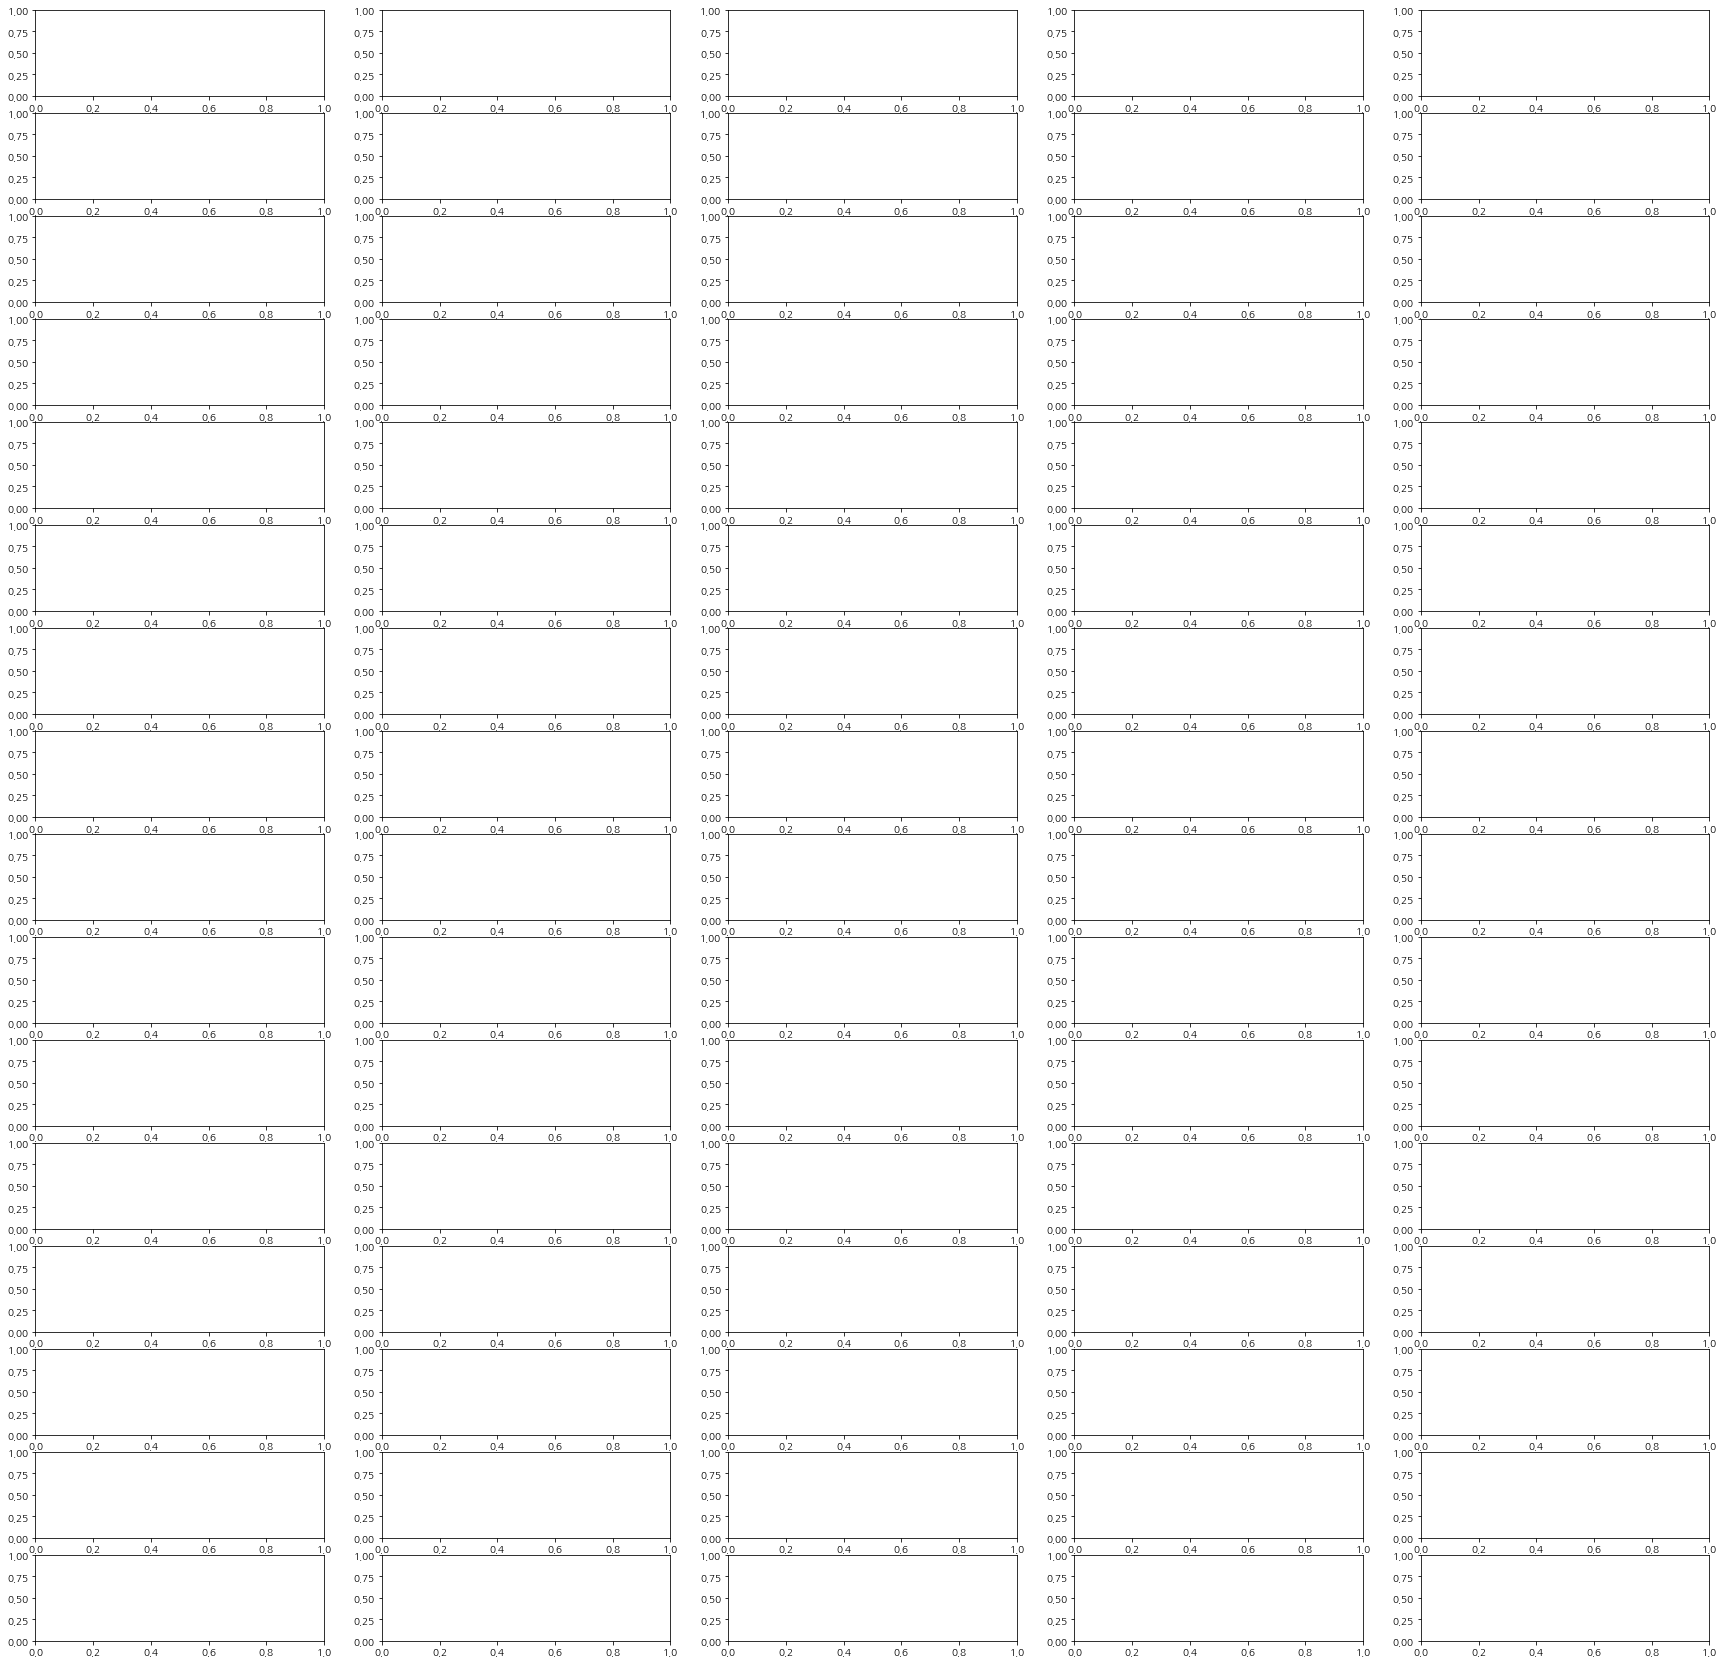

In [ ]:
f, axes = plt.subplots(16, 5, figsize=(30, 30))
# f.set_size_inches((12, 12))
# plt.subplots_adjust(wspace = 0.15, hspace = 0.15)

axes[0].hist2d(col_31, label=['after', 'before'], color=['r','b'], stacked=True, bins=25)

plt.show()

In [ ]:
len(range(31, 109))

78

In [ ]:
# plt.hist(array, stacked=True, bins=25)
# plt.legend(loc=0)
# plt.grid()

In [ ]:
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Serif',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'DejaVu Serif Display',
 'cmr10',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'STIXGeneral',
 'DejaVu Sans Display',
 'STIXSizeFiveSym',
 'cmb10',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'cmss10',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'cmtt10',
 'STIXNonUnicode',
 'cmmi10',
 'cmex10',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'cmsy10',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'STIXGeneral',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'STIXSizeOneSym',
 'NanumGothicCoding',
 'NanumSquare',
 'NanumMyeongjo',
 'NanumGothic',
 'Liberation Serif',
 'NanumGothic Eco',
 'NanumSquareRound',
 'NanumMyeongjo Eco',
 'NanumMyeongjo',
 'NanumGothic',
 'Liberation Mono',
 'NanumSquare',
 'NanumGothicCoding',
 'Liberation Mono',
 'NanumSquareRound',
 'NanumSquareRound',
 'Liberation Serif',
 'Liberatio

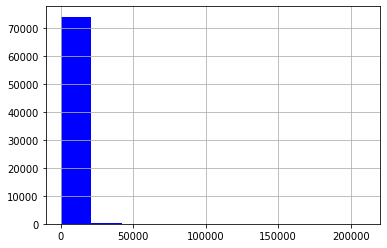

In [ ]:
nolog_merge_df.iloc[:, 31].hist(color='b')

In [ ]:
# 위의 이 시각화로 컬럼별로 비교할건데, for문으로 컬럼별로 다 출력되면 좋겠지만..... 안되면 ㅠㅠ 일일히 다 뽑거나
# 중요한 컬럼들을 확인해보자.. 근데 일일히 다뽑아야할듯 그게 성의니까... 노션에 다 정리해서 ㅠㅠ

In [ ]:
# 일단 미적분 인강 듣고 와서
# 로그 스케일링 적용한 csv 파일 만들어서 다시 탭넷 돌려보자!
# 일요일까지라두 다음주 연구미팅 일정 잡아보자 ㅠ0ㅠ